<a href="https://colab.research.google.com/github/Yuviworks/week-3-AICTE-SHELL/blob/main/Garbage_Classification_Densenet_final_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import required libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Rescaling, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.applications import DenseNet121
from sklearn.metrics import classification_report, confusion_matrix
import os


In [2]:
from google.colab import files
uploaded = files.upload()


Saving TrashType_Image_Dataset.zip to TrashType_Image_Dataset.zip


In [3]:
import zipfile
import os

zip_path = "TrashType_Image_Dataset.zip"  # ✅ Make sure this matches uploaded file name
extract_path = "/content/data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Unzipped to:", extract_path)


✅ Unzipped to: /content/data


In [4]:
dataset_path = "/content/data/TrashType_Image_Dataset"


In [5]:
import tensorflow as tf

batch_size = 32
img_height = 224
img_width = 224

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

class_names = train_ds.class_names
print("📂 Classes:", class_names)


Found 2527 files belonging to 6 classes.
Using 2022 files for training.
Found 2527 files belonging to 6 classes.
Using 505 files for validation.
📂 Classes: ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


In [6]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)


In [7]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras import layers, models

base_model = DenseNet121(
    include_top=False,
    weights="imagenet",
    input_shape=(img_height, img_width, 3)
)
base_model.trainable = False

model = models.Sequential([
    layers.Rescaling(1./255),
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(len(class_names), activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ densenet121 (Functional)        │ (None, 7, 7, 1024)     │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ ?                      │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,037,504 (26.85 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 7,037,504 (26.85 MB)

In [15]:
initial_epochs = 10

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=initial_epochs
)


Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 490s 8s/step - accuracy: 0.8250 - loss: 0.4955 - val_accuracy: 0.8574 - val_loss: 0.4616
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 502s 8s/step - accuracy: 0.8983 - loss: 0.2897 - val_accuracy: 0.8554 - val_loss: 0.4622
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 487s 7s/step - accuracy: 0.9160 - loss: 0.2366 - val_accuracy: 0.8653 - val_loss: 0.4512
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 511s 8s/step - accuracy: 0.9295 - loss: 0.1974 - val_accuracy: 0.8713 - val_loss: 0.4388
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 503s 8s/step - accuracy: 0.9524 - loss: 0.1649 - val_accuracy: 0.8693 - val_loss: 0.4293
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 502s 8s/step - accuracy: 0.9496 - loss: 0.1538 - val_accuracy: 0.8733 - val_loss: 0.4196
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 498s 8s/step - accuracy: 0.9623 - loss: 0.1285 - val_accuracy: 0.8832 - val_loss: 0.4112
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 508s 8s/step - accuracy: 0.9612 - loss: 0.1323 - val_accuracy: 0.8792 - v

In [9]:
# ✅ Unfreeze top 30% layers of DenseNet
base_model.trainable = True
fine_tune_at = int(len(base_model.layers) * 0.7)

for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# ✅ Compile again (required after making layers trainable)
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),  # Smaller LR
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [10]:
from tensorflow.keras.callbacks import EarlyStopping

# ✅ Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# ✅ Fine-tune model
fine_tune_epochs = 10
total_epochs = initial_epochs + fine_tune_epochs

history_fine = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=total_epochs,
    initial_epoch=history.epoch[-1],
    callbacks=[early_stop]
)


Epoch 10/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 512s 7s/step - accuracy: 0.6805 - loss: 1.0227 - val_accuracy: 0.8594 - val_loss: 0.4498
Epoch 11/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 495s 7s/step - accuracy: 0.8394 - loss: 0.4991 - val_accuracy: 0.8475 - val_loss: 0.4627
Epoch 12/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 504s 7s/step - accuracy: 0.8803 - loss: 0.3306 - val_accuracy: 0.8515 - val_loss: 0.4672
Epoch 13/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 504s 7s/step - accuracy: 0.9014 - loss: 0.2807 - val_accuracy: 0.8653 - val_loss: 0.4576


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


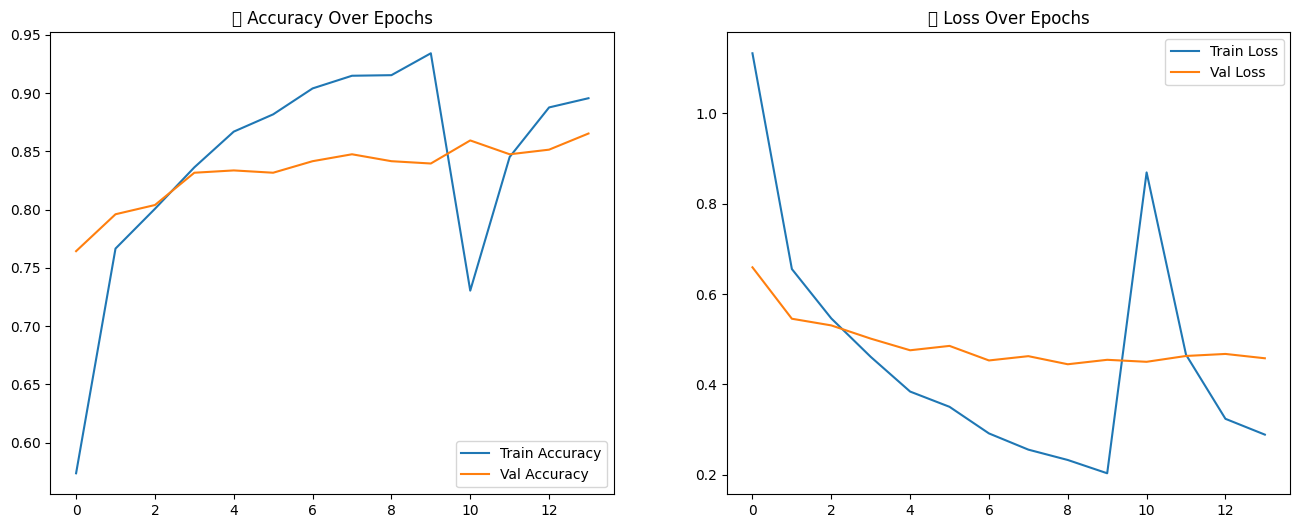

In [11]:
import matplotlib.pyplot as plt

acc = history.history['accuracy'] + history_fine.history['accuracy']
val_acc = history.history['val_accuracy'] + history_fine.history['val_accuracy']

loss = history.history['loss'] + history_fine.history['loss']
val_loss = history.history['val_loss'] + history_fine.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Val Accuracy')
plt.legend(loc='lower right')
plt.title('📈 Accuracy Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Val Loss')
plt.legend(loc='upper right')
plt.title('📉 Loss Over Epochs')
plt.show()


16/16 ━━━━━━━━━━━━━━━━━━━━ 86s 5s/step
📊 Classification Report:

              precision    recall  f1-score   support

   cardboard       0.89      0.90      0.90        83
       glass       0.84      0.89      0.87       103
       metal       0.82      0.83      0.83        78
       paper       0.87      0.94      0.90       124
     plastic       0.89      0.81      0.85        88
       trash       0.79      0.52      0.62        29

    accuracy                           0.86       505
   macro avg       0.85      0.81      0.83       505
weighted avg       0.86      0.86      0.86       505



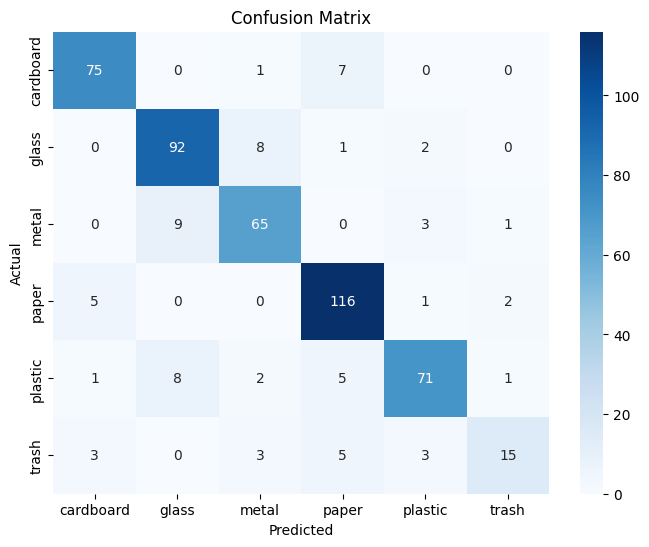

In [12]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ⚠️ Only works if dataset not shuffled and batched
val_images = []
val_labels = []

for images, labels in val_ds.unbatch().take(1000):  # adjust number if needed
    val_images.append(images.numpy())
    val_labels.append(labels.numpy())

val_images = np.array(val_images)
val_labels = np.array(val_labels)

# ✅ Predict classes
pred_probs = model.predict(val_images, verbose=1)
pred_labels = np.argmax(pred_probs, axis=1)

# ✅ Classification report
print("📊 Classification Report:\n")
print(classification_report(val_labels, pred_labels, target_names=class_names))

# ✅ Confusion Matrix
cm = confusion_matrix(val_labels, pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


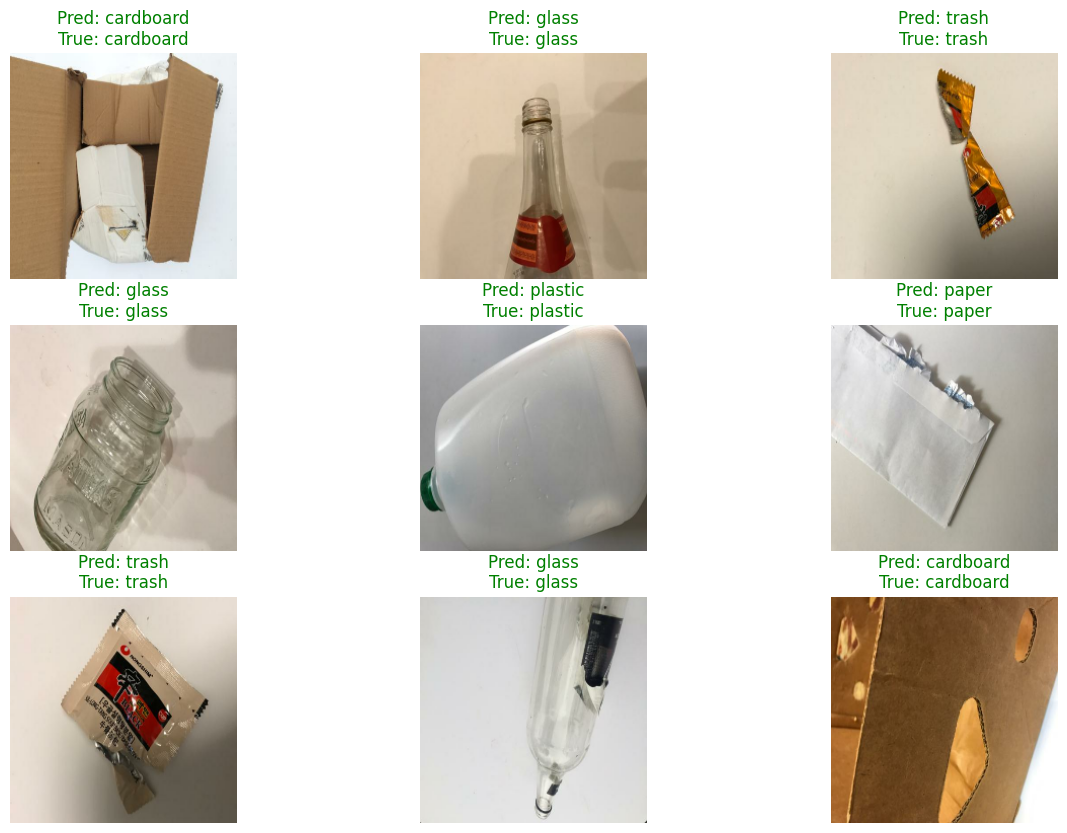

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Take a few batches from the validation dataset
for images, labels in val_ds.take(1):
    preds = model.predict(images)
    pred_labels = np.argmax(preds, axis=1)
    true_labels = labels.numpy()

    plt.figure(figsize=(15, 10))
    for i in range(9):  # Show 9 images
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        pred_class = class_names[pred_labels[i]]
        true_class = class_names[true_labels[i]]
        color = "green" if pred_class == true_class else "red"
        plt.title(f"Pred: {pred_class}\nTrue: {true_class}", color=color)
        plt.axis("off")
    break


In [14]:
# Save the model
model.save("garbage_classifier_densenet.h5")
print("✅ Model saved as 'garbage_classifier_densenet.h5'")


✅ Model saved as 'garbage_classifier_densenet.h5'


In [17]:
from google.colab import files
files.download("garbage_classifier_densenet.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>